# Case Study - Multiple linear regression model for the prediction of demand for shared bikes 


### Author: Prashant Mohan Sinha

<hr>

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

Company wants to understand the factors on which the demand for these shared bikes depends. The company wants to know based on gathered various meteorological surveys and people's styles data set:

-    Which variables are significant in predicting the demand for shared bikes.
-    How well those variables describe the bike demands


**Business Goal:**

Model the demand for shared bikes with the available independent variables; to chalk out the business strategy by the management to meet the demand levels and meet the customer's expectations. 

<hr>

## Step 1: Reading, Understanding & Formatting the Data

__Let us first the eequisite Libraries and read the provided csv file dataset & display some info.__

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Requisite Libraries
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as sp

<hr>

### 1.1 Read CSV Data file & Display some Info 

In [3]:
# Read the csv file
df = pd.read_csv('day.csv')

# Display the Random 6 Rows 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


__Column Name Arrtibute Info:__
> Details of above listed variable is sourced from provided 'Readme.txt', which are as follows:
>
>	- instant: record index
>	- dteday : date
>	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
>	- yr : year (0: 2018, 1:2019)
>	- mnth : month ( 1 to 12)
>	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
>	- weekday : day of the week
>	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
>	+ weathersit : 
>		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
>		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
>		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
>		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
>	- temp : temperature in Celsius
>	- atemp: feeling temperature in Celsius
>	- hum: humidity
>	- windspeed: wind speed
>	- casual: count of casual users
>	- registered: count of registered users
>	- cnt: count of total rental bikes including both casual and registered

<hr>


In [4]:
# Check the size of the input data
df.shape

(730, 16)

In [5]:
# Display the Info of the Raw Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


__Display the some basic stats__

In [6]:
df.describe().round(decimals = 2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


<hr>

### 1.2 Categorical Variable Encoding - For User Interpretation

For the EDA purpose & user understandable naming, we will encode some categorical variable numerical values to interpretable values.

__Convert the `dteday` from object to date format & read out the day & month into variable `weekday` & `mnth`__

Both `weekday` & `mnth` can easily be derived from `dteday`.

In [7]:
# overwriting data after changing format
df['dteday']= pd.to_datetime(df['dteday'])

# Create temporary weekday & month variable by coping the weekday & mnth values into it, we will delete it later on.
df['tmp_weekday'] = df['weekday']
df['tmp_mnth'] = df['mnth']

# Derive 'weekday' and 'month' from 'dteday'
df['weekday'] = df['dteday'].dt.day_name()
df['mnth'] = df['dteday'].dt.month_name()

Reassign the some other categorical variables to make it more interpretable.

In [8]:
# # Double bracket is used for series to convert it dfframe
df[['season']] = df[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

df[['weathersit']] = df[['weathersit']].apply(lambda x: x.map({1:'clearWeather', 2:'mistyWeather', 3:'LightSnowRainWeather'}))

df[['yr']] = df[['yr']].apply(lambda x: x.map({0:'2018', 1:'2019'}))

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tmp_weekday,tmp_mnth
0,1,2018-01-01,spring,2018,January,0,Monday,0,mistyWeather,14.110847,18.18125,80.5833,10.749882,331,654,985,6,1
1,2,2018-02-01,spring,2018,February,0,Thursday,0,mistyWeather,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,2018-03-01,spring,2018,March,0,Thursday,1,clearWeather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1
3,4,2018-04-01,spring,2018,April,0,Sunday,1,clearWeather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2,1
4,5,2018-05-01,spring,2018,May,0,Tuesday,1,clearWeather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,3,1


### 1.3 Find the number of distinct values in each columns

Just to cross check whether any column is having one unique value or not. 

In [9]:
df.nunique().sort_values()

yr               2
workingday       2
holiday          2
weathersit       3
season           4
tmp_weekday      7
weekday          7
tmp_mnth        12
mnth            12
temp           498
hum            594
casual         605
windspeed      649
registered     678
atemp          689
cnt            695
dteday         730
instant        730
dtype: int64

<hr>

#### Observation:

* There are 730 rows and 16 columns. In any column, there is no missing values.
* Any of the column is having more than one unique value.
* It is easy to observed that some columns fall under categorical type, which are: `season`, `yr`, `mnth`, `holiday`, `weekday`, `weathersit`.
* Other than categorical and columns `instant` and `dteday`, all other variables are continuous numerical variables.
* There are dinstict 730 records of `instant` (record index) and `dteday` (date), which may not be useful for the futher analysis, should be dropped.

<hr>

### 1.4 Dropping columns `instant` & `dteday`

In [10]:
df = df.drop(['instant','dteday'], axis=1)

### 1.5 Rename the cnt column name

For better user interpretability, let’s change the name of `cnt` to ‘TotalUsers’. 

In [11]:
df.rename(columns={'cnt': 'TotalUsers'}, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,TotalUsers,tmp_weekday,tmp_mnth
0,spring,2018,January,0,Monday,0,mistyWeather,14.110847,18.18125,80.5833,10.749882,331,654,985,6,1
1,spring,2018,February,0,Thursday,0,mistyWeather,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,spring,2018,March,0,Thursday,1,clearWeather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1
3,spring,2018,April,0,Sunday,1,clearWeather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2,1
4,spring,2018,May,0,Tuesday,1,clearWeather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,3,1


### 1.6 Cross check the sum of Causal & Registerd with TotalUsers

Check the total number of `casual` & `registered` user is equal to `TotalUsers` variable
if the difference of the sum of `casual` & `registered` users with `TotalUsers` is zero, then `TotalUsers` values are ok. This is just to cross-check the sanity of the sum of the `casual` & `registered` with `TotalUsers` values.

In [12]:
tmp = df['casual'] + df['registered'] - df['TotalUsers']
print('Minumum of difference = ', tmp.min())
print('Maximum of difference = ', tmp.max())

Minumum of difference =  0
Maximum of difference =  0


<hr>

#### Observation:

* No discrepency found in the total number of `casual` & `registered` user  with total count (variable `TotalUsers`).

<hr>

### 1.7 Round the some Continuous Variables upto 2 decimal place

In [13]:
varlist = ['temp', 'atemp', 'hum', 'windspeed']
df[varlist] = df[varlist].round(decimals = 2)
df[varlist].head()

,temp,atemp,hum,windspeed
0,14.11,18.18,80.58,10.75
1,14.90,17.69,69.61,16.65
2,8.05,9.47,43.73,16.64
3,8.20,10.61,59.04,10.74
4,9.31,11.46,43.70,12.52


## Step 2: Visualisation & Data Formatting

### 2.1 Visualising dataset through pairplot and Heat Map

Let's create variable list of categorical & continuous variables.

In [14]:
ctg_cont_var=['holiday','workingday']
cont_var=['temp', 'atemp', 'hum', 'windspeed','casual','registered', 'TotalUsers']

Let's make a pairplot of all the categorical numerical variables

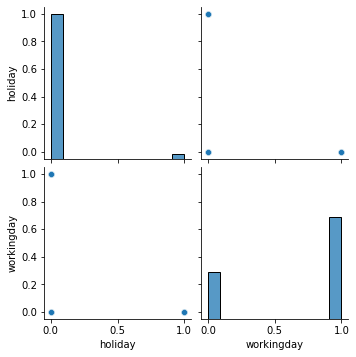

In [15]:
sns.pairplot(df[ctg_cont_var])
plt.show()

<hr>

#### Observation:

* From the above pairplot, for a non-working day, it can be a holiday or no holiday. 

<hr>

__Reassign the `holiday` & `workingday` variables values to make it more interpretable.__

In [16]:
df[['holiday']] = df[['holiday']].apply(lambda x: x.map({0:'no', 1:'yes'}))
df[['workingday']] = df[['workingday']].apply(lambda x: x.map({0:'no', 1:'yes'}))

__Let's make a pairplot of all the continuous numeric variables.__

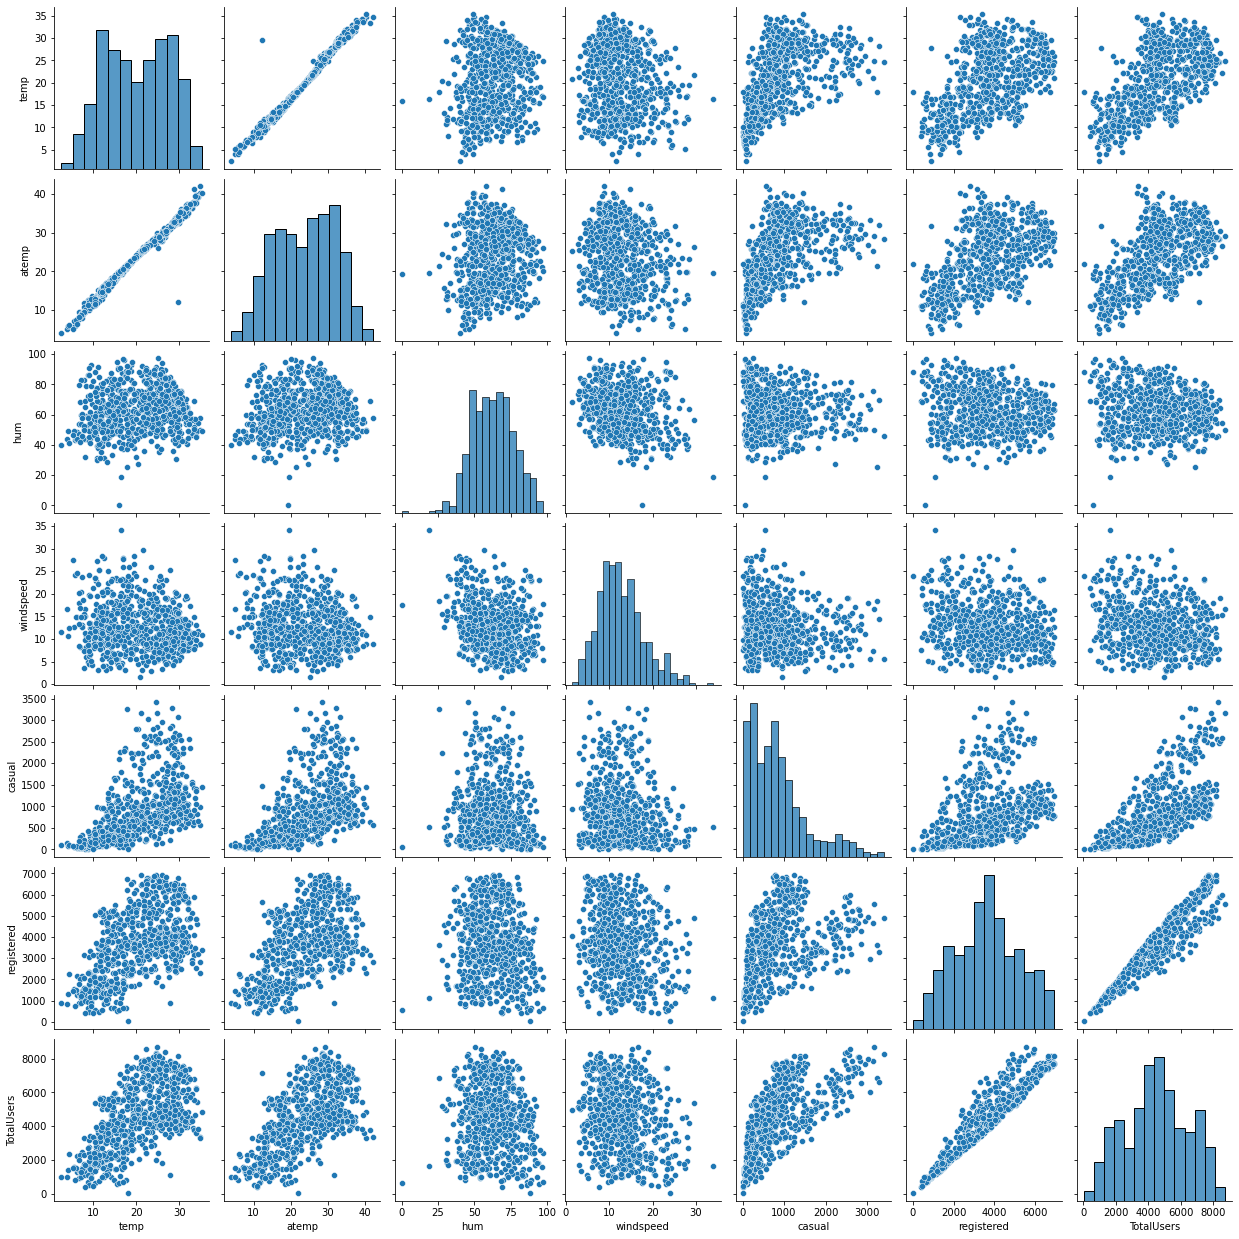

In [17]:
sns.pairplot(df[cont_var])
plt.show()

<hr>

#### Observation:

* Temperature (`temp`) & Feeling Temperature (`atemp`) shows very good linear correlation, suggest temp is linearly related with atemp with very little variance. This is most potential a case of collinearity.Let's measure the correlation value before making any conclusion.
* Histogram of `temp` is representative of bimodel (minor). Variation in the teperature class suggest for the different season temperatures.
* `Humidity` & `Windspeed` does not show high correlation with the temperature. 
* `Casual` & `registered` & `TotalUser` shows the good correlation with the temp. Although Casual shows some outliers. Further to observe that from the scatterplot of `casual` with `temp` and `atemp`, there is change in the variance (coning pattern), i.e. heteroscedasticity. 
* `registered` users show the normal distribution whereas casual is showing positively skewed histogram.
* `TotalUsers` emcompass both the `casual` & `registered` bike user & shows the normal distribution, i.e. effect of the `casual` data does not alter the overall pattern. This suggest `TotalUsers` can be used as a final target variable to predict.

<hr>

__Correlation plot of temp & atemp with Casual & Registered Bike User__

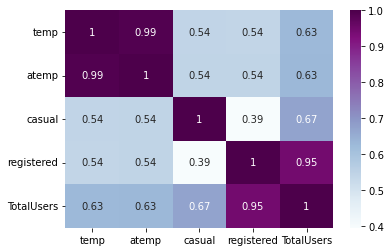

In [18]:
const_var=['temp','atemp','casual','registered', 'TotalUsers']
sns.heatmap(df[const_var].corr(), cmap="BuPu",annot=True)
plt.show()

<hr>

#### Observation:

* The above heat plot reconfirms the high degree of correlation (0.99) between `temp` & `atemp`. 
* Further to visualize, `casual`, `registered` & `TotalUsers` bike users have the same correlaton with temp and `atemp`.
* Now it can be concluded that one of the variables either `temp` or `atemp` can be dropped. The business modelling interpretation is customer behaviour centric, thus the feeling temperature would be prefer for the regression purpose, we will drop `temp`.

<hr>

__Dropping `temp` variable__

In [19]:
df = df.drop(['temp'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,TotalUsers,tmp_weekday,tmp_mnth
0,spring,2018,January,no,Monday,no,mistyWeather,18.18,80.58,10.75,331,654,985,6,1
1,spring,2018,February,no,Thursday,no,mistyWeather,17.69,69.61,16.65,131,670,801,0,1
2,spring,2018,March,no,Thursday,yes,clearWeather,9.47,43.73,16.64,120,1229,1349,1,1
3,spring,2018,April,no,Sunday,yes,clearWeather,10.61,59.04,10.74,108,1454,1562,2,1
4,spring,2018,May,no,Tuesday,yes,clearWeather,11.46,43.70,12.52,82,1518,1600,3,1


Let's plot the heat map of all the variables:

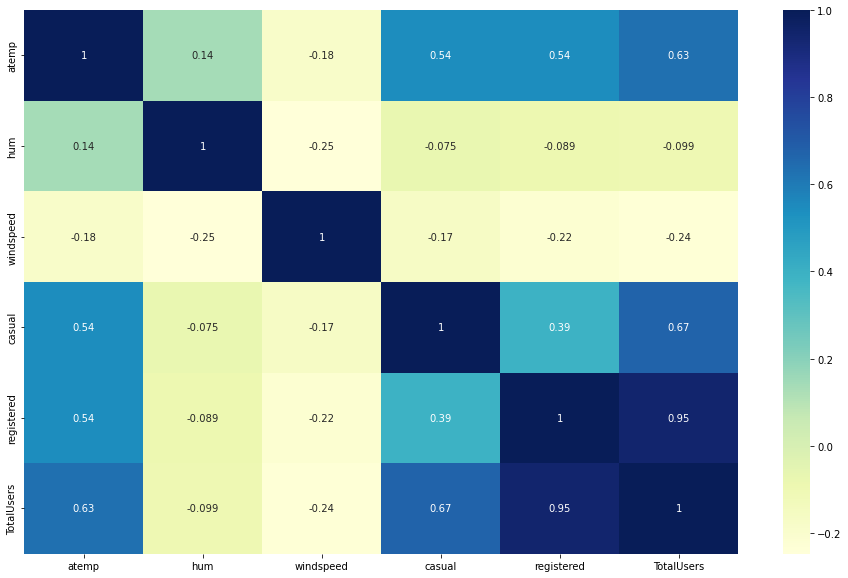

In [20]:
cont_var=['atemp', 'hum', 'windspeed','casual','registered', 'TotalUsers']
plt.figure(figsize=(16,10))
sns.heatmap(df[cont_var].corr(), cmap="YlGnBu",annot=True)
plt.show()

<hr>

#### Observation:

* The above heat plot confirms the increase in the correlation with `TotalUsers` rather than individually from `casual` & `registered` user except for the variables `holiday` and `workingday` (correlation opposite to each other). 
* For example: with `holiday` variable, `registered` user is negetively correlated whereas `casual` user is positively correlated. For `workingday` the correlation is vice-versa.
* Overall, it suggest that we can keep `TotalUsers` and drop `casual` and `registered` user. 
* For EDA purpose, we will keep `casual` and `registered` variable for time being.

<hr>

### 2.3 Visualising Categorical Variables

In [21]:
# Set Colour Variable & size
fig_color='#FFD700' # Gold Colour
axis_color1='#FFF0F5' # Light Pink Colour
axis_color2='#F0FFFF' # Light Colour
col_list=['red', 'green', 'magenta', 'cyan', 'blue','black']
axfs=15

In [22]:
# Define function for the boxplot with subplot (dimension: nX1 only)
def func_boxplot(nrows, varx, vary, varhue, df,figszi,figszj,fig_color,titlename):
    
    fig, axs = plt.subplots(figsize=(figszi,figszj))
    fig.set_facecolor(fig_color)
    fig.suptitle(titlename, size=16, y=0.9)
    
    for i in range(nrows):
        plt.subplot(nrows+1,1,i+1)
        if varhue=='':
            sns.boxplot(x=varx, y=vary[i], data=df)
        else:
            sns.boxplot(x=varx, y=vary[i], hue=varhue, data=df)
        
      

__Boxplot of Bike Users in Different Years against Working Day__

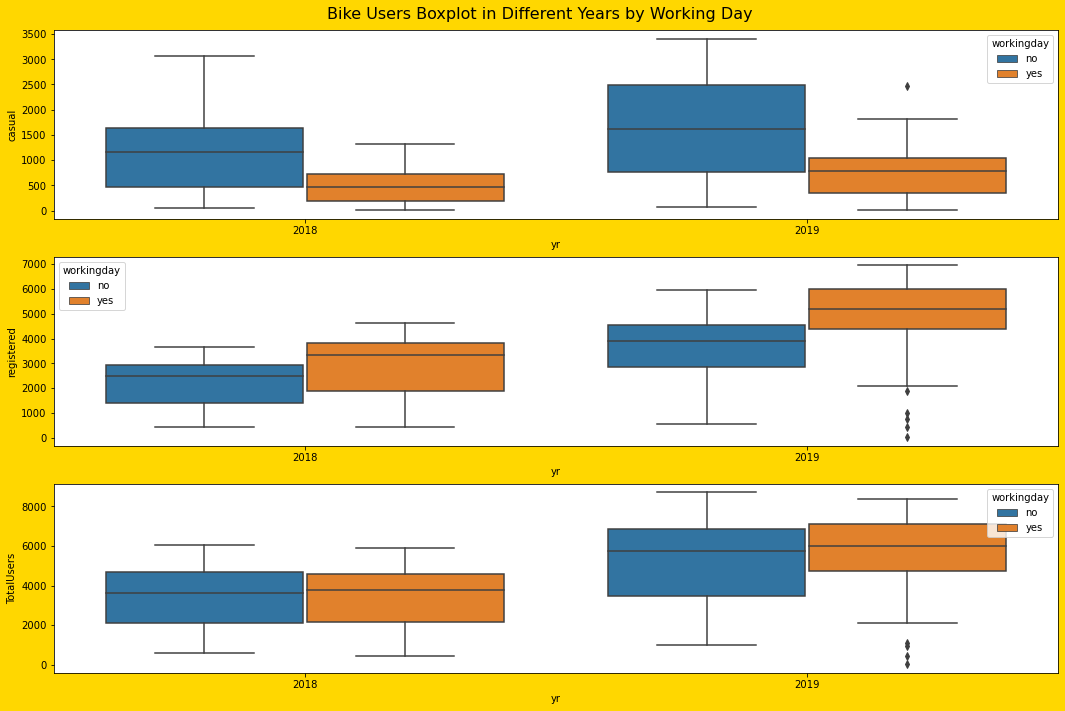

In [23]:
vary=['casual','registered','TotalUsers']
titlename = "Bike Users Boxplot in Different Years by Working Day"
func_boxplot(3, 'yr', vary, 'workingday', df,18,16,fig_color,titlename)


<hr>

#### Observation:

* Casual Bike User - Normally Casual bikes users used the bike service on non-working day & demand has increased from year 2018 to 2019.
* Registered Bike User - Registered bike user used the service in the working day. For any case either working or non- working, the registered users used the services much higher than casual bike users.
* Total Users: Demand has increased from the year 2018 to 2019.

<hr>

__Boxplot of Bike Users in Different Months against Working Day__

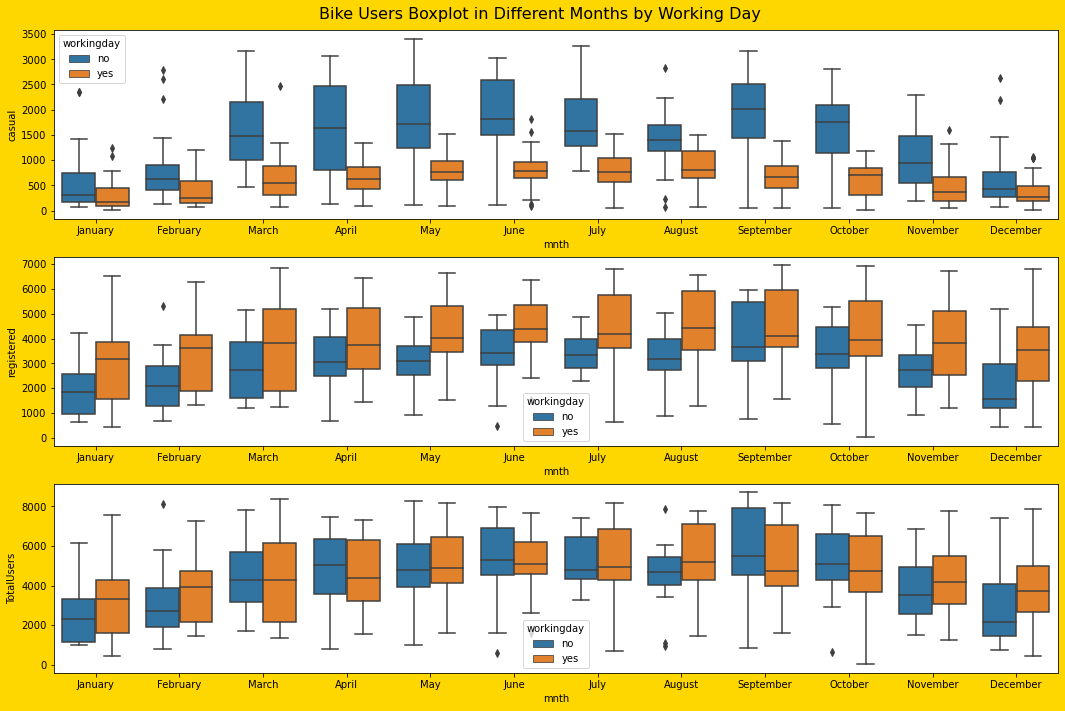

In [24]:
vary=['casual','registered','TotalUsers']
titlename = "Bike Users Boxplot in Different Months by Working Day"
func_boxplot(3, 'mnth', vary, 'workingday', df,18,16,fig_color,titlename)

<hr>

#### Observation:

* Casual Bike User – Demand has increased from March month to October Month. Trends follows the same pattern for working & non-working days. Peak observed from 5<sup>th</sup> month to 10<sup>th</sup> month.
* Registered Bike User - Registered bike user shows constant increase in demand from 1<sup>th</sup> month to 10<sup>th</sup> month. Median of the 11<sup>th</sup> & 12<sup>th</sup> is comparable to previous month. 
* Total Users: Nearly follows the registered user pattern. It indicates the impact of registered users are much higher than casual users in business line. We will check the percentage contribution from the both categories in the business line in the later section.

<hr>

__Boxplot of Bike Users in Different Weekday__

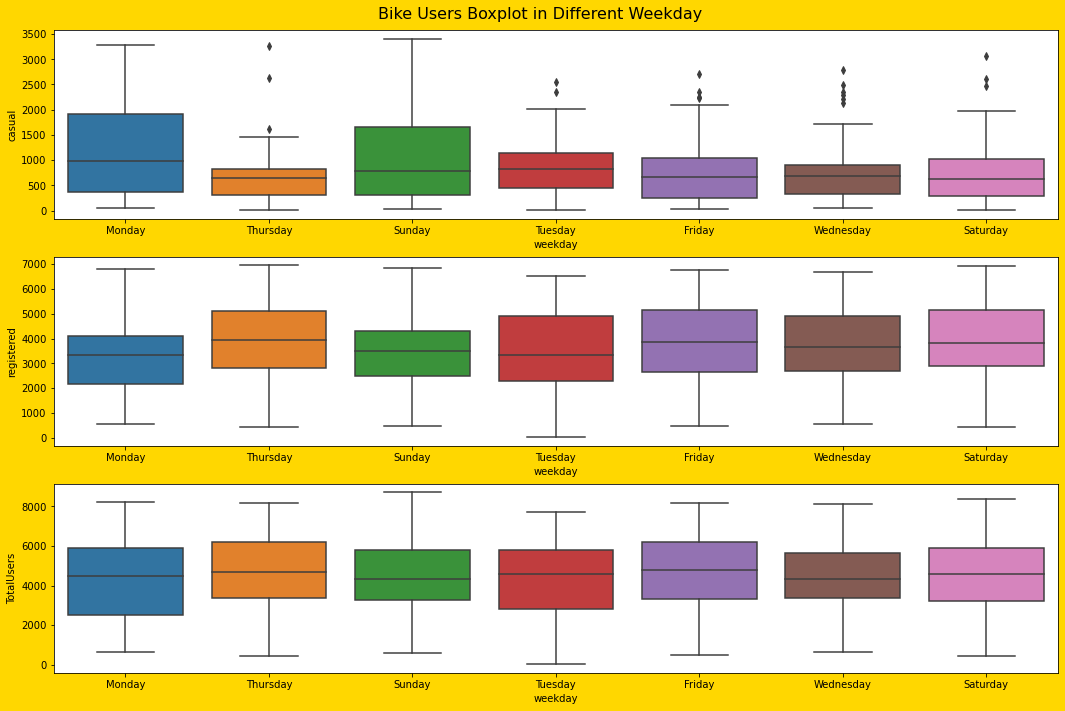

In [25]:
vary=['casual','registered','TotalUsers']
titlename = "Bike Users Boxplot in Different Weekday"
func_boxplot(3, 'weekday', vary, '', df,18,16,fig_color,titlename)

<hr>

#### Observation:

* For all Weekday of `TotalUsers`, the demand for bike remained approx. same. It suggest that we may leave creating dummy variable for `weekday`.  

<hr>

__Boxplot of Bike Users in Different Weather against Working Day__

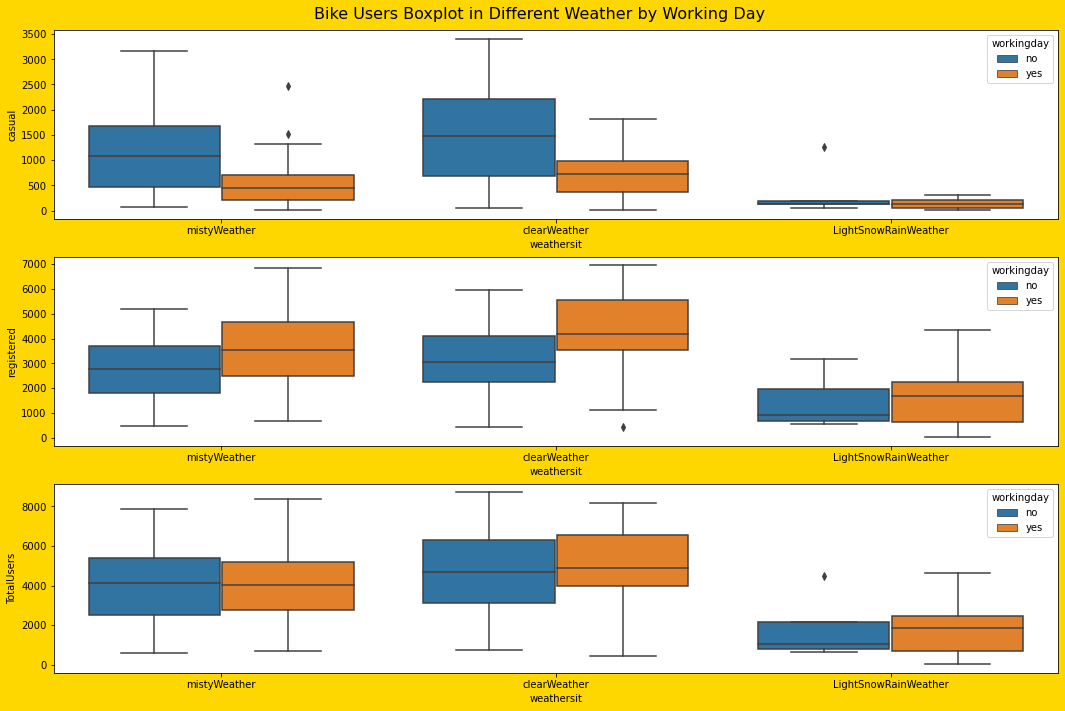

In [26]:
vary=['casual','registered','TotalUsers']
titlename = "Bike Users Boxplot in Different Weather by Working Day"
func_boxplot(3, 'weathersit', vary, 'workingday', df,18,16,fig_color,titlename)

<hr>

#### Observation:

* Clearly impact of the bad weather such as light snow and rain affects the bike use. Significant drop observed in the bad weather condition.

<hr>

__Boxplot & Barplot of Bike Users in Different Seasons against Working Day__

Percent contribution of casual users in entire dataset =  18.84 %



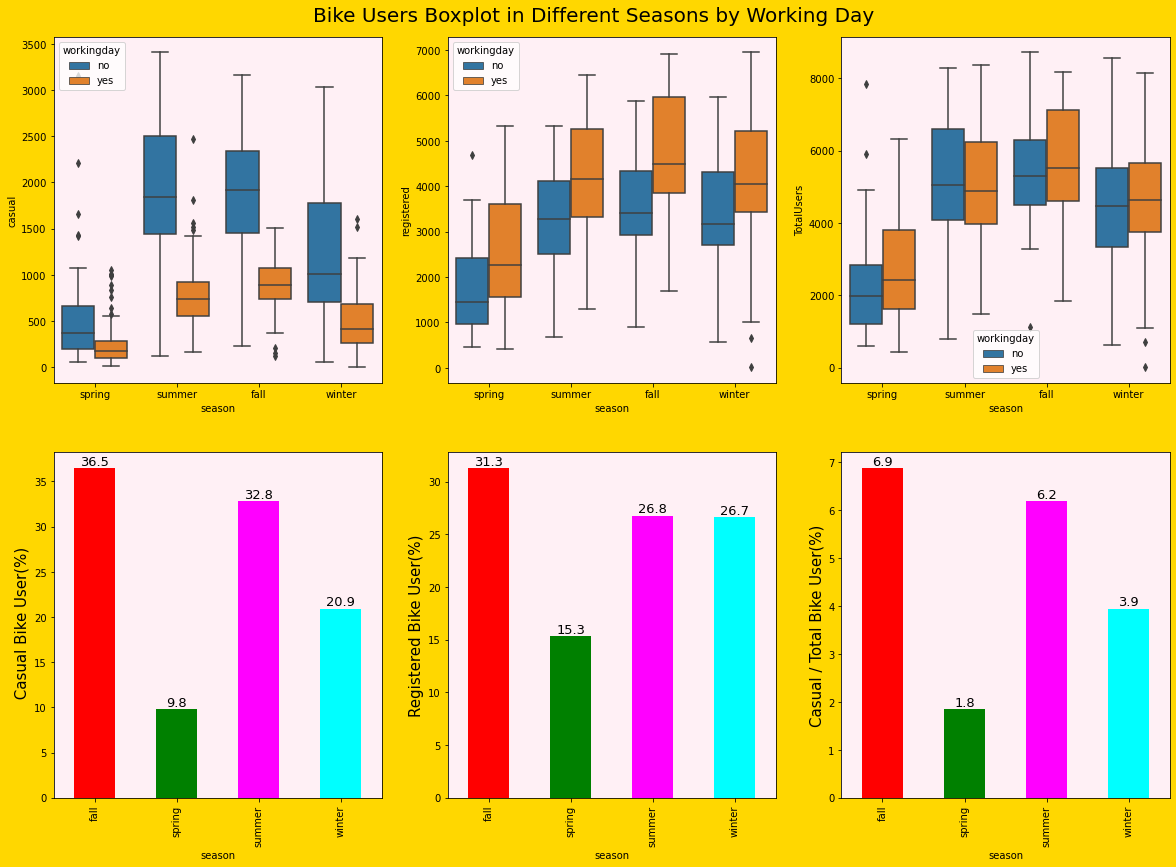

In [27]:
fgx=2
fgy=3

fig, axs = plt.subplots(fgx,fgy, figsize=(20,14))
#((ax1,ax2,ax3),(ax4,ax5,ax6))=axs
fig.set_facecolor(fig_color)
axs[0,0].set_facecolor(axis_color1)
axs[0,1].set_facecolor(axis_color1)
axs[0,2].set_facecolor(axis_color1)
axs[1,0].set_facecolor(axis_color1)
axs[1,1].set_facecolor(axis_color1)
axs[1,2].set_facecolor(axis_color1)
axs[1,0].set_facecolor(axis_color1)
axs[1,1].set_facecolor(axis_color1)

fig.suptitle("Bike Users Boxplot in Different Seasons by Working Day", size=20, y=0.91)

plt.subplot(fgx,fgy,1)
bp1 = sns.boxplot(x='season', y='casual', hue='workingday', data=df)

plt.subplot(fgx,fgy,2)
bp2 = sns.boxplot(x='season', y='registered', hue='workingday', data=df)

plt.subplot(fgx,fgy,3)
bp2 = sns.boxplot(x='season', y='TotalUsers', hue='workingday', data=df)

plt.subplot(fgx,fgy,4)
x1=df.groupby('season').casual.sum() * 100 / df['casual'].sum()
bp4=x1.plot(kind="bar", color=col_list)
bp4.bar_label(bp4.containers[0],fmt='%.1f', size=axfs-2)
bp4.set_ylabel(' Casual Bike User(%)', size = axfs)

plt.subplot(fgx,fgy,5)
x2=df.groupby('season').registered.sum() * 100 / df['registered'].sum()
bp5=x2.plot(kind="bar", color=col_list)
bp5.bar_label(bp5.containers[0],fmt='%.1f', size=axfs-2)
bp5.set_ylabel('Registered Bike User(%)', size = axfs)

plt.subplot(fgx,fgy,6)
casual_by_TotalUser = df.groupby('season').casual.sum() * 100 / df['TotalUsers'].sum()
bp6=casual_by_TotalUser.plot(kind="bar", color=col_list)
bp6.bar_label(bp6.containers[0],fmt='%.1f', size=axfs-2)
bp6.set_ylabel('Casual / Total Bike User(%)', size = axfs)

print ('Percent contribution of casual users in entire dataset = ', \
       (df.casual.sum() * 100 / df['TotalUsers'].sum()).round(decimals = 2),'%\n')


plt.show()

<hr>

#### Observation:

* Registered user have used the bike service in three seasons, mostly in fall (peak demand, approx. 37% in total registered class), winter and summer, whearas casual user used the bike services in two seasons mostly in fall (peak demand, approx. 37% in total casual class) & summer. 

* The common drop for both type users Registered & Casual has been witnessed in spring season. Why the fall in demand in spring, is the users going out of the station or the reason is something else. For winter case, let's futher investigate the effect of the weather.

* Percent Contribution from the `casual` User segment varies from **7% to 2%** for different seasons. Total demand contribution from `casual` segment is **19%**, thus `registered` user is amount to **81%** to the business line.

<hr>

__Box Plot - Use of Rental Bikes in Different Seasons__

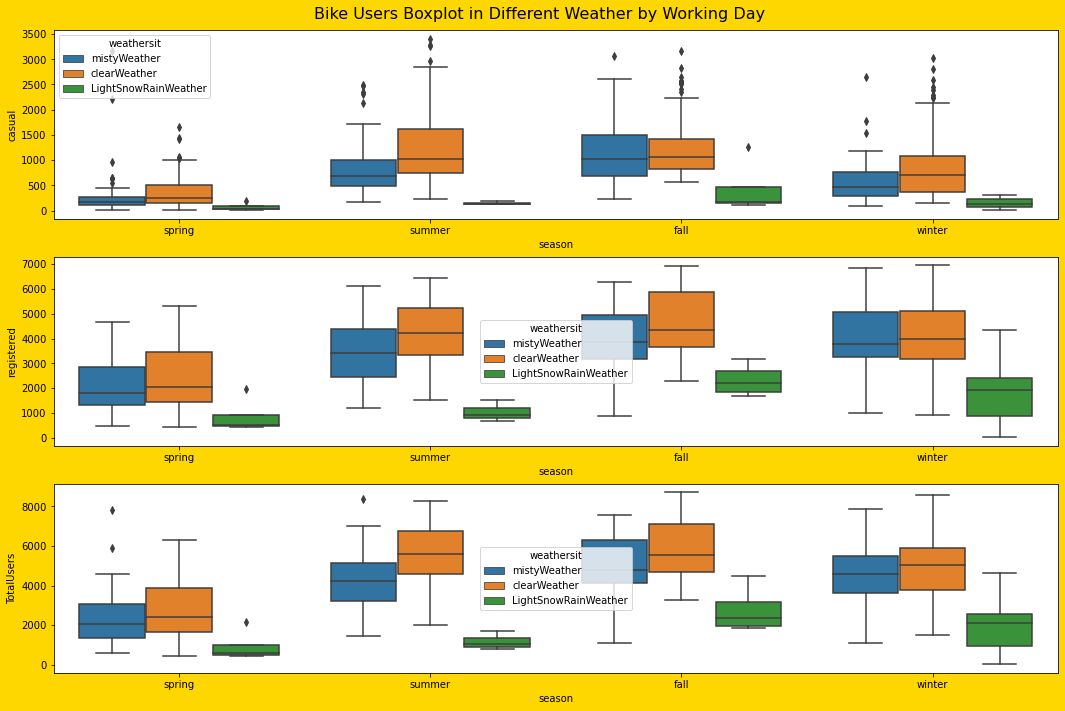

In [28]:
vary=['casual','registered','TotalUsers']
titlename = "Bike Users Boxplot in Different Weather by Working Day"
func_boxplot(3, 'season', vary, 'weathersit', df,18,16,fig_color,titlename)

<hr>

#### Observation:

* Bad weather in winter season affects the use of bike in negative sense.
* Same pattern of trend observed in `TotalUser` as observed in `registered` user.

<hr>

__Barplot of Bike Users: 1. Hoiday & 2. Working Day__

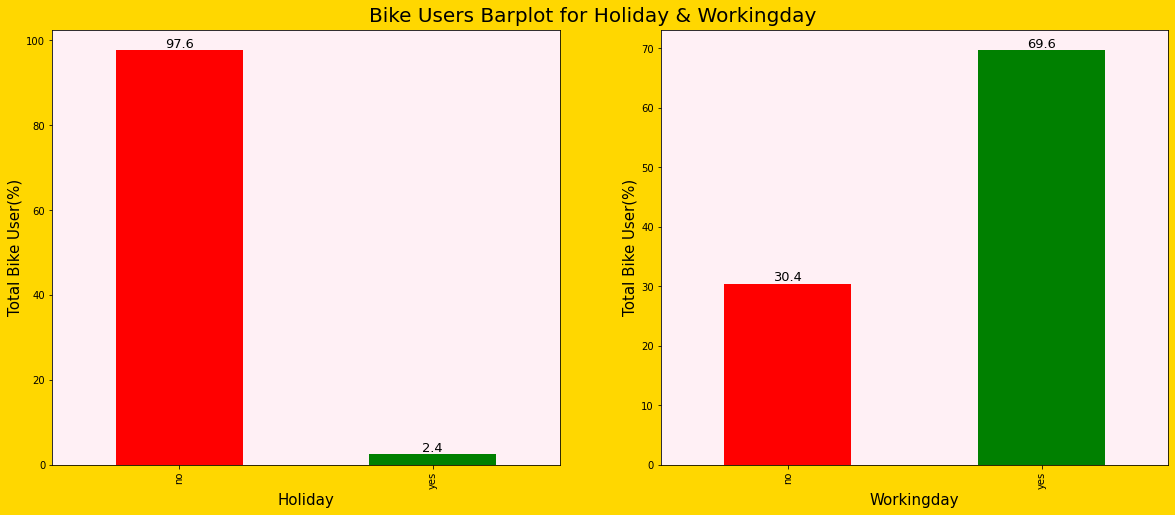

In [29]:
fig, axs = plt.subplots(1,2, figsize=(20,8))
(ax1,ax2)=axs
fig.set_facecolor(fig_color)
ax1.set_facecolor(axis_color1)
ax2.set_facecolor(axis_color1)

fig.suptitle("Bike Users Barplot for Holiday & Workingday", size=20, y=0.92)

plt.subplot(1,2,1)
x1=df.groupby('holiday').TotalUsers.sum() * 100 / df['TotalUsers'].sum()
bp1=x1.plot(kind="bar", color=col_list, ax=ax1)
bp1.bar_label(bp1.containers[0],fmt='%.1f', size=axfs-2)
bp1.set_ylabel('Total Bike User(%)', size = axfs)
bp1.set_xlabel('Holiday', size = axfs)

plt.subplot(1,2,2)
TotalUserWD = df.groupby('workingday').TotalUsers.sum() * 100 / df['TotalUsers'].sum()
bp2=TotalUserWD.plot(kind="bar", color=col_list, ax=ax2)
bp2.bar_label(bp2.containers[0],fmt='%.1f', size=axfs-2)
bp2.set_ylabel('Total Bike User(%)', size = axfs)
bp2.set_xlabel('Workingday', size = axfs)

plt.show()


<hr>

#### Observation:

* Most of business of bike demand (98% for the last two years 2018-19) comes from non-holiday.
* About 70% of bike demand is on `workingday`.

<hr>

#### Dropping columns `casual` & `registered`

From all of the above findings, it is preferred to drop the `casual` & `registered` columns

In [30]:
df = df.drop(['casual','registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,TotalUsers,tmp_weekday,tmp_mnth
0,spring,2018,January,no,Monday,no,mistyWeather,18.18,80.58,10.75,985,6,1
1,spring,2018,February,no,Thursday,no,mistyWeather,17.69,69.61,16.65,801,0,1
2,spring,2018,March,no,Thursday,yes,clearWeather,9.47,43.73,16.64,1349,1,1
3,spring,2018,April,no,Sunday,yes,clearWeather,10.61,59.04,10.74,1562,2,1
4,spring,2018,May,no,Tuesday,yes,clearWeather,11.46,43.70,12.52,1600,3,1


#### Checking  outliers 

Let's check the outliers in `atemp`, `hum` & `windspeed`

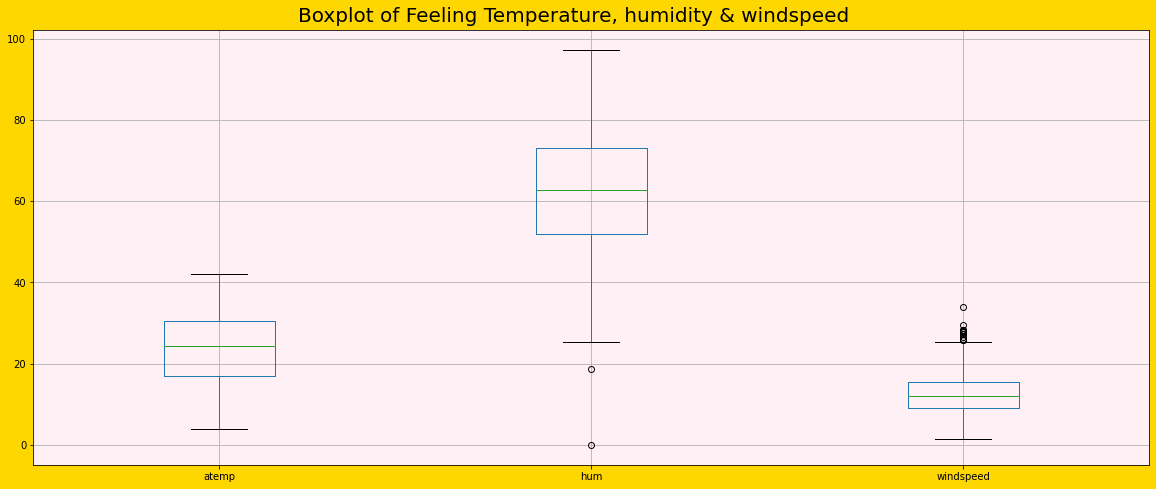

In [31]:
# Boxplot of atemp, hum & windspeed
fig, axs = plt.subplots(1,1, figsize=(20,8))
fig.set_facecolor(fig_color)
axs.set_facecolor(axis_color1)
fig.suptitle("Boxplot of Feeling Temperature, humidity & windspeed", size=20, y=0.92)
df.boxplot(column=['atemp', 'hum', 'windspeed'])
plt.show()

No outliers observed in `atemp`, and observed outliers in `hum`idity and `windspeed`.

In [32]:
# Filter the data based on quantile
q_low = df["hum"].quantile(0.01)
q_hi  = df["windspeed"].quantile(0.97)
df_filtered = df[(df["windspeed"] < q_hi) & (df["hum"] > q_low)]
print('Original data size: ',df.shape)
print('Filtered data size: ',df_filtered.shape)

Original data size:  (730, 13)
Filtered data size:  (700, 13)


30 rows has been filtered fron the original data set.

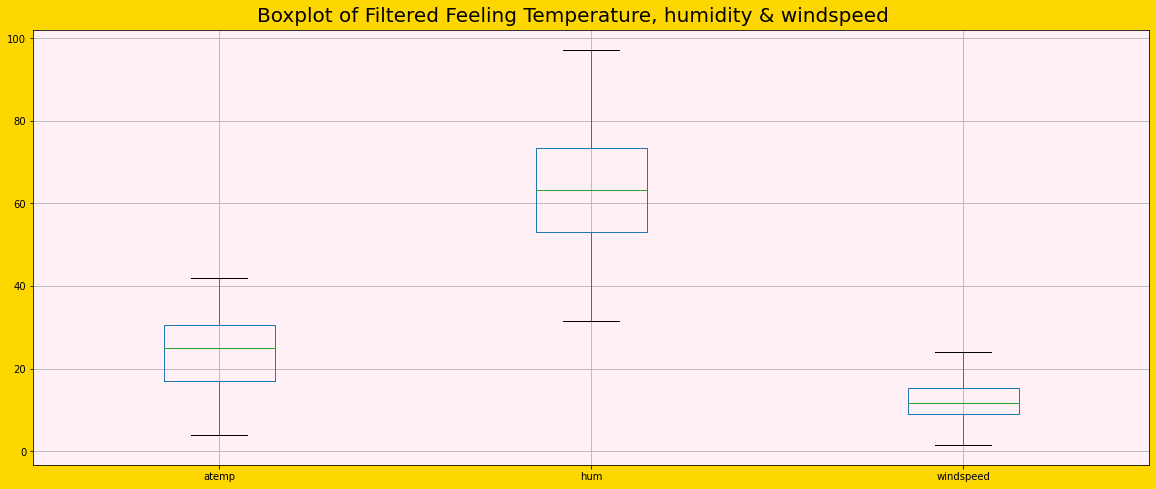

In [33]:
# Boxplot of atemp, hum & windspeed of Filtered data
fig, axs = plt.subplots(1,1, figsize=(20,8))
fig.set_facecolor(fig_color)
axs.set_facecolor(axis_color1)
fig.suptitle("Boxplot of Filtered Feeling Temperature, humidity & windspeed", size=20, y=0.92)
df_filtered.boxplot(column=['atemp', 'hum', 'windspeed'])
plt.show()

We have sucessfully removed the outliers only from the dataset.

In [34]:
# replace the original dataset value with filtered datset
df=df_filtered

<hr> 

## Step 3: Create Dummy Variables

Let's create `dummy variables` for `season`, `yr`, `holiday`, `weekday`, `workingday` & `weathersit` variables.

__As discussed above we will not use the `weekday` for dummy variable creation.__

__Although we have seen the variation in demand along with the month, but the whole year is also segmented into four `season`; which is again the combination of some months time period. For the sake of simplicity we will not create the dummy variable for each month.__ 

In [35]:
# Get the dummy variables for the feature `season` and store it in a new variable - 'dummy_season'
dummy_season = pd.get_dummies(df['season'])
dummy_season.sample(6)

,fall,spring,summer,winter
351,0,0,0,1
39,0,1,0,0
587,1,0,0,0
70,0,1,0,0
150,0,0,1,0
278,0,0,0,1


Now, we don't need four columns. we can drop the one column, as the type of `season` can be identified with just the three columns where: 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [36]:
# Let's drop a column from dummy variable list
dummy_season = pd.get_dummies(df['season'], drop_first = True) 

dummy_season.sample(6)

,spring,summer,winter
106,0,1,0
415,1,0,0
705,0,0,1
632,0,0,1
229,0,0,0
418,1,0,0


Let's perform the similar operation of dummy variables for the rest of vaiables namely: `yr`, `holiday`, `workingday` & `weathersit`. 

In [37]:
dummy_yr = pd.get_dummies(df['yr'], drop_first = True) # Dummy Variable for year, drop 2018 on the basis of box plot
dummy_yr.sample(6)

,2019
652,1
258,0
181,0
697,1
369,1
608,1


In [38]:
dummy_weather = pd.get_dummies(df['weathersit'], drop_first = True)  # Dummy Variable for Weather
dummy_weather.sample(6)

,clearWeather,mistyWeather
16,0,1
726,0,1
104,1,0
180,1,0
671,0,1
652,0,1


In [39]:
 # Dummy Variable for holiday
dummy_holiday = pd.get_dummies(df['holiday'], drop_first = True)

dummy_holiday.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [40]:
# Rename the holiday=0 to 'holidaydummy'
dummy_holiday.rename(columns={'yes': 'holidaydummy'}, inplace=True)

In [41]:
dummy_workingday = pd.get_dummies(df['workingday'],drop_first=True)  # Dummy Variable for workingday & drop first

# Rename the holiday=0 to 'holidaydummy'
dummy_workingday.rename(columns={'yes': 'workingdaydummy'}, inplace=True)

dummy_workingday.head()

,workingdaydummy
0,0
1,0
2,1
3,1
4,1


In [42]:
# Add the results to the original df dataframe
df = pd.concat([df, dummy_season, dummy_yr, dummy_weather, dummy_holiday, dummy_workingday], 
               axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,tmp_weekday,tmp_mnth,spring,summer,winter,2019,clearWeather,mistyWeather,holidaydummy,workingdaydummy
0,spring,2018,January,no,Monday,no,mistyWeather,18.18,80.58,10.75,...,6,1,1,0,0,0,0,1,0,0
1,spring,2018,February,no,Thursday,no,mistyWeather,17.69,69.61,16.65,...,0,1,1,0,0,0,0,1,0,0
2,spring,2018,March,no,Thursday,yes,clearWeather,9.47,43.73,16.64,...,1,1,1,0,0,0,1,0,0,1
3,spring,2018,April,no,Sunday,yes,clearWeather,10.61,59.04,10.74,...,2,1,1,0,0,0,1,0,0,1
4,spring,2018,May,no,Tuesday,yes,clearWeather,11.46,43.70,12.52,...,3,1,1,0,0,0,1,0,0,1


Copy the original weekday & month from temp weekday & month variable.
Drop  `season`, `yr`, `holiday`, `weekday`, `workingday`, `weathersit`, `tmp_weekday` & `tmp_mnth` variables. as we have created the dummies for it.

In [43]:
df['weekday'] = df['tmp_weekday'] # Copy the original weekday from temp weekday variable
df['mnth'] = df['tmp_mnth']  # Copy the original month from temp month variable

df.drop(['season', 'yr', 'weathersit', 'holiday', 'workingday', 'tmp_weekday', 'tmp_mnth'], axis = 1, inplace = True)

# Rename the holidaydummy as 'holiday & workingdaydummy as workingday'
df.rename(columns={'holidaydummy': 'holiday'}, inplace=True)
df.rename(columns={'workingdaydummy': 'workingday'}, inplace=True)
df.rename(columns={'2019': 'year2019'}, inplace=True)

df.head()

,mnth,weekday,atemp,hum,windspeed,TotalUsers,spring,summer,winter,year2019,clearWeather,mistyWeather,holiday,workingday
0,1,6,18.18,80.58,10.75,985,1,0,0,0,0,1,0,0
1,1,0,17.69,69.61,16.65,801,1,0,0,0,0,1,0,0
2,1,1,9.47,43.73,16.64,1349,1,0,0,0,1,0,0,1
3,1,2,10.61,59.04,10.74,1562,1,0,0,0,1,0,0,1
4,1,3,11.46,43.70,12.52,1600,1,0,0,0,1,0,0,1


<hr> 

## Step 4: Multile Linear Regression Modelling - Training, Testing & Prediction

### 4.1 Splitting the Data into Training and Testing Sets

In [44]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively. Train Size=70%, Test Size=30%

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### 4.2 Rescaling the Features 

We will use MinMax scaling.

In [45]:
# Import the Libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'TotalUsers']

df_train_before_scaling = df_train[num_vars]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,mnth,weekday,atemp,hum,windspeed,TotalUsers,spring,summer,winter,year2019,clearWeather,mistyWeather,holiday,workingday
423,2,2,0.360462,0.125868,0.479413,0.474707,1,0,0,1,1,0,0,1
445,3,4,0.594119,0.797470,0.238997,0.777496,0,1,0,1,1,0,0,1
255,9,2,0.688632,0.614376,0.315665,0.522999,0,0,0,0,1,0,0,1
496,5,6,0.611447,0.256363,0.256507,0.844863,0,1,0,1,1,0,0,0
234,8,2,0.691783,0.217800,0.331283,0.659664,0,0,0,0,1,0,0,1


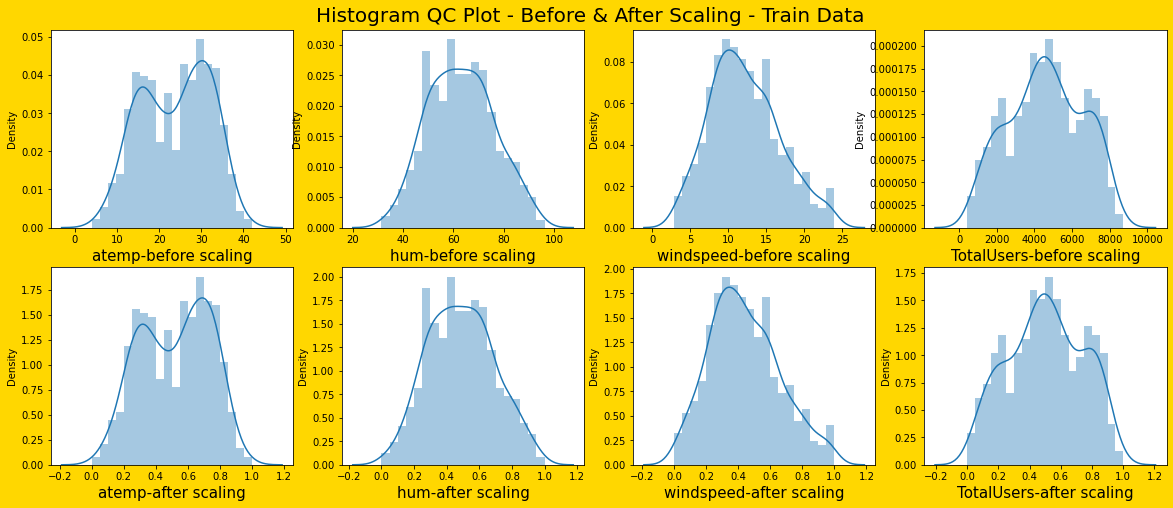

In [47]:
# Plot the histogram of the Before & After Scaling of Train Data Set
fig, axs = plt.subplots(2,4, figsize=(20,8))
fig.set_facecolor(fig_color)

fig.suptitle("Histogram QC Plot - Before & After Scaling - Train Data", size=20, y=0.92)

plt.subplot(2,4,1)
bp1=sns.distplot(df_train_before_scaling['atemp'], bins = 20)
bp1.set_xlabel('atemp-before scaling', size = axfs)

plt.subplot(2,4,5)
bp2=sns.distplot(df_train['atemp'], bins = 20)
bp2.set_xlabel('atemp-after scaling', size = axfs)

plt.subplot(2,4,2)
bp1=sns.distplot(df_train_before_scaling['hum'], bins = 20)
bp1.set_xlabel('hum-before scaling', size = axfs)

plt.subplot(2,4,6)
bp2=sns.distplot(df_train['hum'], bins = 20)
bp2.set_xlabel('hum-after scaling', size = axfs)

plt.subplot(2,4,3)
bp1=sns.distplot(df_train_before_scaling['windspeed'], bins = 20)
bp1.set_xlabel('windspeed-before scaling', size = axfs)

plt.subplot(2,4,7)
bp2=sns.distplot(df_train['windspeed'], bins = 20)
bp2.set_xlabel('windspeed-after scaling', size = axfs)

plt.subplot(2,4,4)
bp1=sns.distplot(df_train_before_scaling['TotalUsers'], bins = 20)
bp1.set_xlabel('TotalUsers-before scaling', size = axfs)

plt.subplot(2,4,8)
bp2=sns.distplot(df_train['TotalUsers'], bins = 20)
bp2.set_xlabel('TotalUsers-after scaling', size = axfs)

plt.show()

<hr>

__Observation:__

MinMax Fitting & Transformation retain the variable distribution pattern.

<hr>

### 4.3 Dividing into X and Y sets for the model building

In [48]:
y_train = df_train.pop('TotalUsers')
X_train = df_train

### 4.4 Building model

Due to large number of variables, We will follow the combination process of elimination i.e. automated process RFE followed by manual elimination.

__4.4.1 RFE (Recursive feature elimination)__

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10) # Used 10 Variables
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mnth', False, 4),
 ('weekday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year2019', True, 1),
 ('clearWeather', True, 1),
 ('mistyWeather', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'year2019',
       'clearWeather', 'mistyWeather', 'holiday'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday'], dtype='object')

__4.4.2 Building model using statsmodel, for the detailed statistics__

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
# Running the first linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalUsers   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     233.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.53e-177
Time:                        17:58:15   Log-Likelihood:                 441.39
No. Observations:                 489   AIC:                            -860.8
Df Residuals:                     478   BIC:                            -814.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0269      0.049      0.549   

In [58]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [59]:
X_train_new.head()

,atemp,hum,windspeed,spring,summer,winter,year2019,clearWeather,mistyWeather,holiday
423,0.360462,0.125868,0.479413,1,0,0,1,1,0,0
445,0.594119,0.797470,0.238997,0,1,0,1,1,0,0
255,0.688632,0.614376,0.315665,0,0,0,0,1,0,0
496,0.611447,0.256363,0.256507,0,1,0,1,1,0,0
234,0.691783,0.217800,0.331283,0,0,0,0,1,0,0


In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,19.69
7,clearWeather,17.43
1,hum,9.40
8,mistyWeather,8.98
2,windspeed,4.77
3,spring,4.34
5,winter,3.24
4,summer,2.24
6,year2019,2.10
9,holiday,1.05


It is sggested to have a VIF that is less than 5. So there are clearly some variables we may need to drop.

__4.4.3 Dropping the variable and updating the model__

One of these variables is `atemp` as it has a very high VIF of `19.69` (which suggest for high degreeof collinearity). Let's go ahead and drop this variable & run the model again.

In [61]:
# Dropping highly correlated variables
X = X_train_new.drop('atemp', 1,)

In [62]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Print the summary of the model (second run)
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalUsers   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.85e-145
Time:                        17:58:16   Log-Likelihood:                 364.01
No. Observations:                 489   AIC:                            -708.0
Df Residuals:                     479   BIC:                            -666.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2796      0.053      5.286   

In [64]:
# Calculate the VIFs again for the new model (second run)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,clearWeather,6.92
0,hum,6.56
7,mistyWeather,5.86
1,windspeed,4.65
5,year2019,2.02
3,summer,1.92
4,winter,1.91
2,spring,1.89
8,holiday,1.05


__4.4.4 Dropping the Variable and Updating the Model__

We can notice from stat summary that P-value & VIF of `hum` is 0.536 (more than 5%) & 6.56 (more than 5) respectively, which suggest of for insignificance & collinearity of the variable in the model. Let's drop the `hum` variable and update the model.

In [65]:
# Dropping insignificant & collinear variable 'hum'
X = X.drop('hum', 1)

In [66]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model (third run)
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalUsers   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.38e-146
Time:                        17:58:16   Log-Likelihood:                 363.81
No. Observations:                 489   AIC:                            -709.6
Df Residuals:                     480   BIC:                            -671.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2580      0.040      6.488   

As we can observed now all the variables are significant now. Now Let's check the VIF of these variable for multi-collinearity.

In [68]:
# Calculate the VIFs again for the new model (third run)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,clearWeather,4.82
0,windspeed,4.63
6,mistyWeather,3.28
4,year2019,2.02
2,summer,1.90
1,spring,1.88
3,winter,1.87
7,holiday,1.05


<hr>
<hr>

__Observation:__

__Although R-squared is lowered (from R<sup>2</sup> = 0.82 of initial RFE based model to R<sup>2</sup> = 0.78 of third updated final model), the updated model (run three) is having VIF less than 5, P-Value is less than 5% (for all the final variable as listed above) & Prob (F-statistic) is near zero for overall model significance acceptability. It suggests for acceptance as final model (`lr_3`).__ 

__Followings are the list of acceptable final variables with its MLR coefficient values:__


In [69]:
print(lr_3.params.round(3))

const           0.258
windspeed      -0.088
spring         -0.344
summer         -0.055
winter         -0.094
year2019        0.265
clearWeather    0.306
mistyWeather    0.223
holiday        -0.086
dtype: float64


<hr>
<hr>

### 4.5 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

**Assumptions for residual analysis**

    - Normality of Error: Error values (ε) are normally distributed for any given value of  X

    - Homoscedasticity: The errors has constant variance
        
    - Independence of Errors: Error values are statistically independent


In [70]:
# Calculate the predicted y_train value from Final MLR Model
y_train_predicted = lr_3.predict(X_train_lm)

In [71]:
# Calculate error
erry = y_train - y_train_predicted

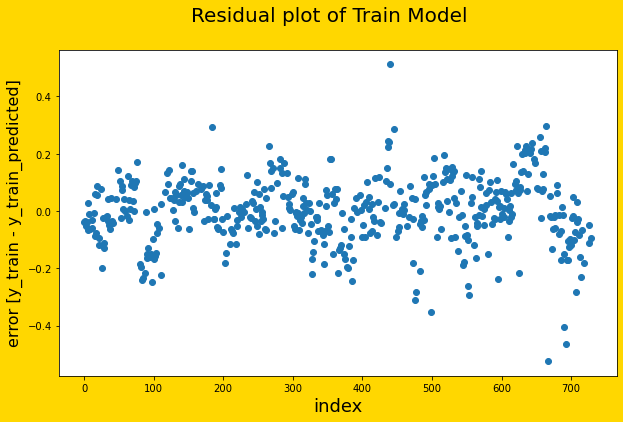

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
fig.set_facecolor(fig_color)

plt.scatter(X.index, erry)
fig.suptitle('Residual plot of Train Model', fontsize=20)              # Plot heading 
plt.xlabel('index', fontsize=18)                          # X-label
plt.ylabel('error [y_train - y_train_predicted]', fontsize=16) 
plt.show()

<hr>

__Observation:__

__The above plot (random distribution of residual) suggest for the fulfilment of Homoscedasticity and Independence of Errors.__

<hr>

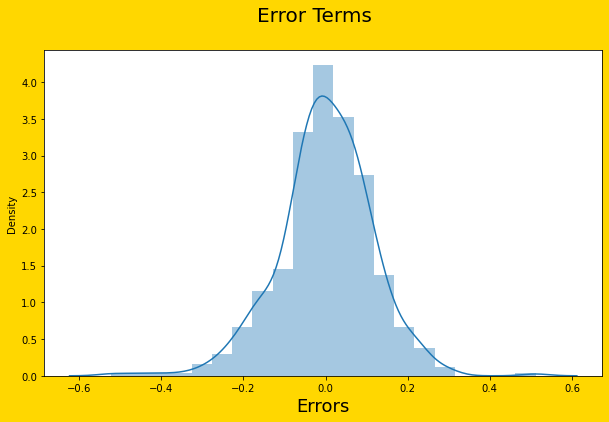

In [73]:
# Plot the histogram of Residual

fig = plt.figure(figsize=(10,6))
fig.set_facecolor(fig_color)

sns.distplot(erry, bins = 21)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

<hr>

__Observation:__

__Peak of the histogram plot of residual is centered at zero, thus error terms have normal distribution.__

<hr>

Let's check the same again by qq plot.

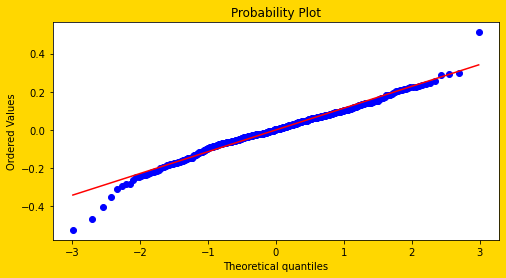

In [74]:
# Normal distribution of the residuals can be validated by plotting a q-q plot.

fig, ax = plt.subplots(figsize=(8,4))
fig.set_facecolor(fig_color)
_, (__, ___, r) = sp.stats.probplot(erry, plot=ax, fit=True)

<hr>

__Observation:__

__The tail at left end, it is somewhat left skewed (negatively), other than that overall fitting follows the straight line. The above plot suggest that error is normally distributed.__

<hr>

### 4.6 Making Predictions

#### Applying the scaling on the test sets

This time we will only apply the transformation and no fitting on test data.

In [75]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('TotalUsers')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

X_test_new.head()

,const,windspeed,spring,summer,winter,year2019,clearWeather,mistyWeather,holiday
400,1.0,0.424042,1,0,0,1,0,1,0
331,1.0,0.316611,0,0,1,0,1,0,0
237,1.0,0.132513,0,0,0,0,1,0,0
441,1.0,0.268339,1,0,0,1,0,1,0
412,1.0,0.518694,1,0,0,1,1,0,0


In [78]:
# Making predictions
y_pred = lr_3.predict(X_test_new)

#### Model Evaluation

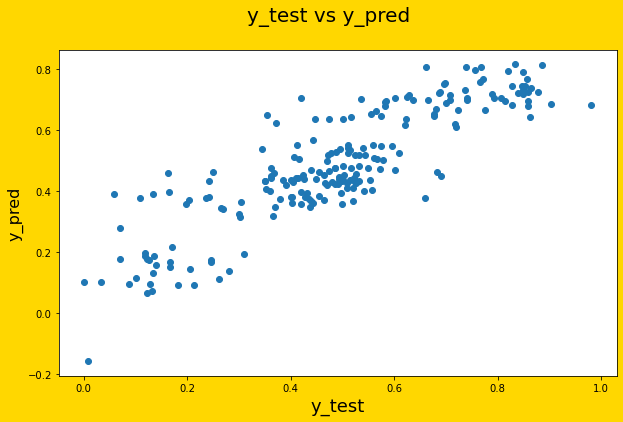

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
fig.set_facecolor(fig_color)

plt.scatter(y_test,y_pred)

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16) 
plt.show()

<hr>

### Conclusion

Let's print the final model coefficients, based on the current Multi-Linear Regression model

In [80]:
df_coeff=pd.DataFrame(lr_3.params.round(3))
df_coeff.columns = ['coefficient']
df_coeff = df_coeff.sort_values(by = "coefficient", ascending = False)
df_coeff

,coefficient
clearWeather,0.306
year2019,0.265
const,0.258
mistyWeather,0.223
summer,-0.055
holiday,-0.086
windspeed,-0.088
winter,-0.094
spring,-0.344


We can construct the equation of our best fitted line as:

$TotalUsers = 0.258 + 0.306  \times  clearWeather + 0.265  \times  year2019 + 0.223 \times mistyWeather - 0.055 \times summer - 0.086 \times holiday - 0.088 \times windspeed - 0.094 \times winter - 0.344 \times spring$

* Demand of the bike is positively correlated with clear weather(strongly), mistyweather & with year 2019.
* Demand of the bike is negatively affected by the season spring(strongly), winter, windspeed, holiday & summer season.
* It cannot be said that this can only be the final model. There is always a scope for the betterment of model with further analysis.

<hr>